In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
import scipy
from matplotlib import pyplot as plt

In [2]:
!kaggle competitions download -c ashrae-energy-prediction

 17%|██████▋                                | 65.0M/379M [00:21<01:37, 3.37MB/s]^C
 17%|██████▋                                | 65.0M/379M [00:22<01:47, 3.07MB/s]
User cancelled operation


In [4]:
!unzip ashrae-energy-prediction.zip -d data

Archive:  ashrae-energy-prediction.zip
  inflating: data/building_metadata.csv  
  inflating: data/sample_submission.csv  
  inflating: data/test.csv           
  inflating: data/train.csv          
  inflating: data/weather_test.csv   
  inflating: data/weather_train.csv  


In [10]:
buildings = pd.read_csv("data/building_metadata.csv")
weather = pd.read_csv("data/weather_train.csv")
df = pd.read_csv('data/train.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
weather['timestamp'] = pd.to_datetime(weather['timestamp'])
buildings['primary_use'].value_counts()

Education                        549
Office                           279
Entertainment/public assembly    184
Public services                  156
Lodging/residential              147
Other                             25
Healthcare                        23
Parking                           22
Warehouse/storage                 13
Manufacturing/industrial          12
Retail                            11
Services                          10
Technology/science                 6
Food sales and service             5
Utility                            4
Religious worship                  3
Name: primary_use, dtype: int64

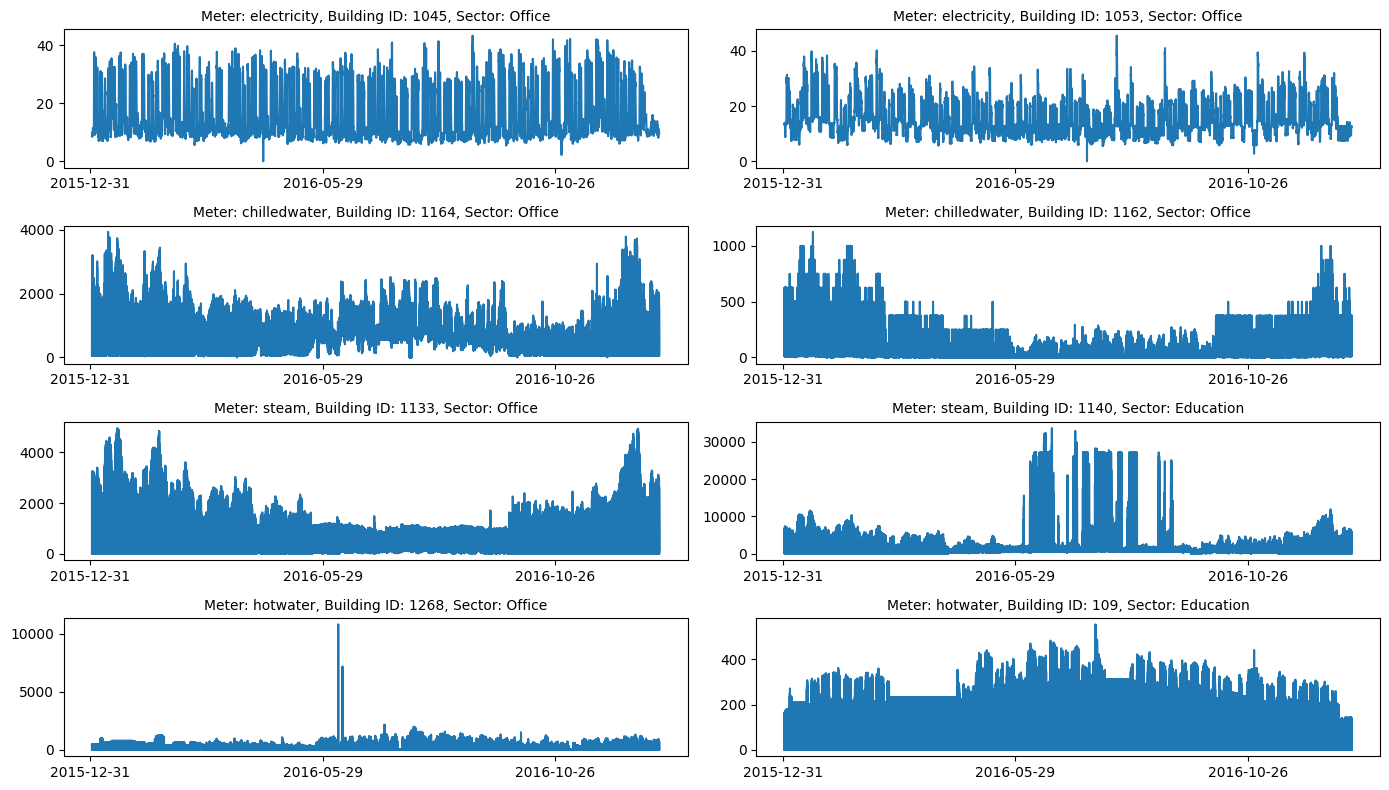

In [14]:
meters = ["electricity", "chilledwater", "steam", "hotwater"]
nrows, ncols = 4, 2
fig, ax = plt.subplots(nrows, ncols, figsize=(14,8))

for meter_id, meter_name in enumerate(meters):
    building_ids = df[df['meter'] == meter_id]['building_id'].value_counts().index[8:16]
    for i in range(2):
        # Plotting buildings with most data points
        building_id = building_ids[i]
        sector = buildings[buildings['building_id'] == building_id]['primary_use'].values[0]
        
        plot_data = df[df['building_id'] == building_id][['timestamp','meter','meter_reading']].sort_values('timestamp')
        
        cax = plt.subplot(nrows, ncols, meter_id * 2 + i+1)
        cax.plot(plot_data['timestamp'].values, plot_data['meter_reading'].values)
        cax.xaxis.set_major_locator(plt.MaxNLocator(3))
        cax.set_title('Meter: {}, Building ID: {}, Sector: {}'.format(meter_name, building_id, sector), fontsize=10)

plt.tight_layout()
plt.show()

In [17]:
# join some tables
bldg_weather = pd.merge(buildings, weather, how="inner", on="site_id")
all_df = pd.merge(bldg_weather, df, how="outer", on=["building_id", "timestamp"])

In [ ]:
all_df.head()